# Module Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

2024-10-10 10:24:45.484205: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-10 10:24:45.484313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-10 10:24:45.609600: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, average_precision_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.utils import to_categorical


# Model Definition

In [3]:
# Define the model
model = Sequential()

# First CNN layer
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))

# Second CNN layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))

# Third CNN layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Fourth CNN layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Fifth CNN layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Dense layer
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       294,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 330,650 (1.26 MB)

 Trainable params: 330,394 (1.26 MB)

 Non-trainable params: 256 (1.00 KB)

In [4]:
# Load the dataset
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Separate features and labels
X_train = train_df.iloc[:, 1:].values
print(X_train)
y_train = train_df.iloc[:, 0].values
print(y_train)

# Normalize the data
X_train = X_train / 255.0

# Reshape the data to match the input shape of the CNN
X_train = X_train.reshape(-1, 28, 28, 1)

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

# Preprocess the test data
X_test = test_df.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


In [6]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, )

Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9801 - loss: 0.0584 - val_accuracy: 0.9755 - val_loss: 0.0984
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9824 - loss: 0.0549 - val_accuracy: 0.9789 - val_loss: 0.0845
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9828 - loss: 0.0517 - val_accuracy: 0.9699 - val_loss: 0.1156
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9850 - loss: 0.0448 - val_accuracy: 0.9762 - val_loss: 0.0938
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9869 - loss: 0.0429 - val_accuracy: 0.9754 - val_loss: 0.0982
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9874 - loss: 0.0376 - val_accuracy: 0.9795 - val_loss: 0.0826
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9857 - loss: 0.0419 - val_accuracy: 0.9807 - val_loss: 0.0737
Epoch 8/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9875 - loss: 0.0366 - val_accuracy: 0.

In [7]:
# Make predictions
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

2024-10-10 10:28:18.316639: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.087, expected 0.857533
2024-10-10 10:28:18.316699: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.20841, expected 0.97894
2024-10-10 10:28:18.316717: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 1.2056, expected 0.976126
2024-10-10 10:28:18.316731: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 1.16297, expected 0.933496
2024-10-10 10:28:18.316741: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 1.10739, expected 0.877919
2024-10-10 10:28:18.316751: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 27: 1.08498, expected 0.855513
2024-10-10 10:28:18.316762: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 1.23455, expected 1.00508
2024-10-10 10:28:18.316772: E external/local_xla/

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [8]:
predictions

array([2, 0, 9, ..., 3, 9, 2])

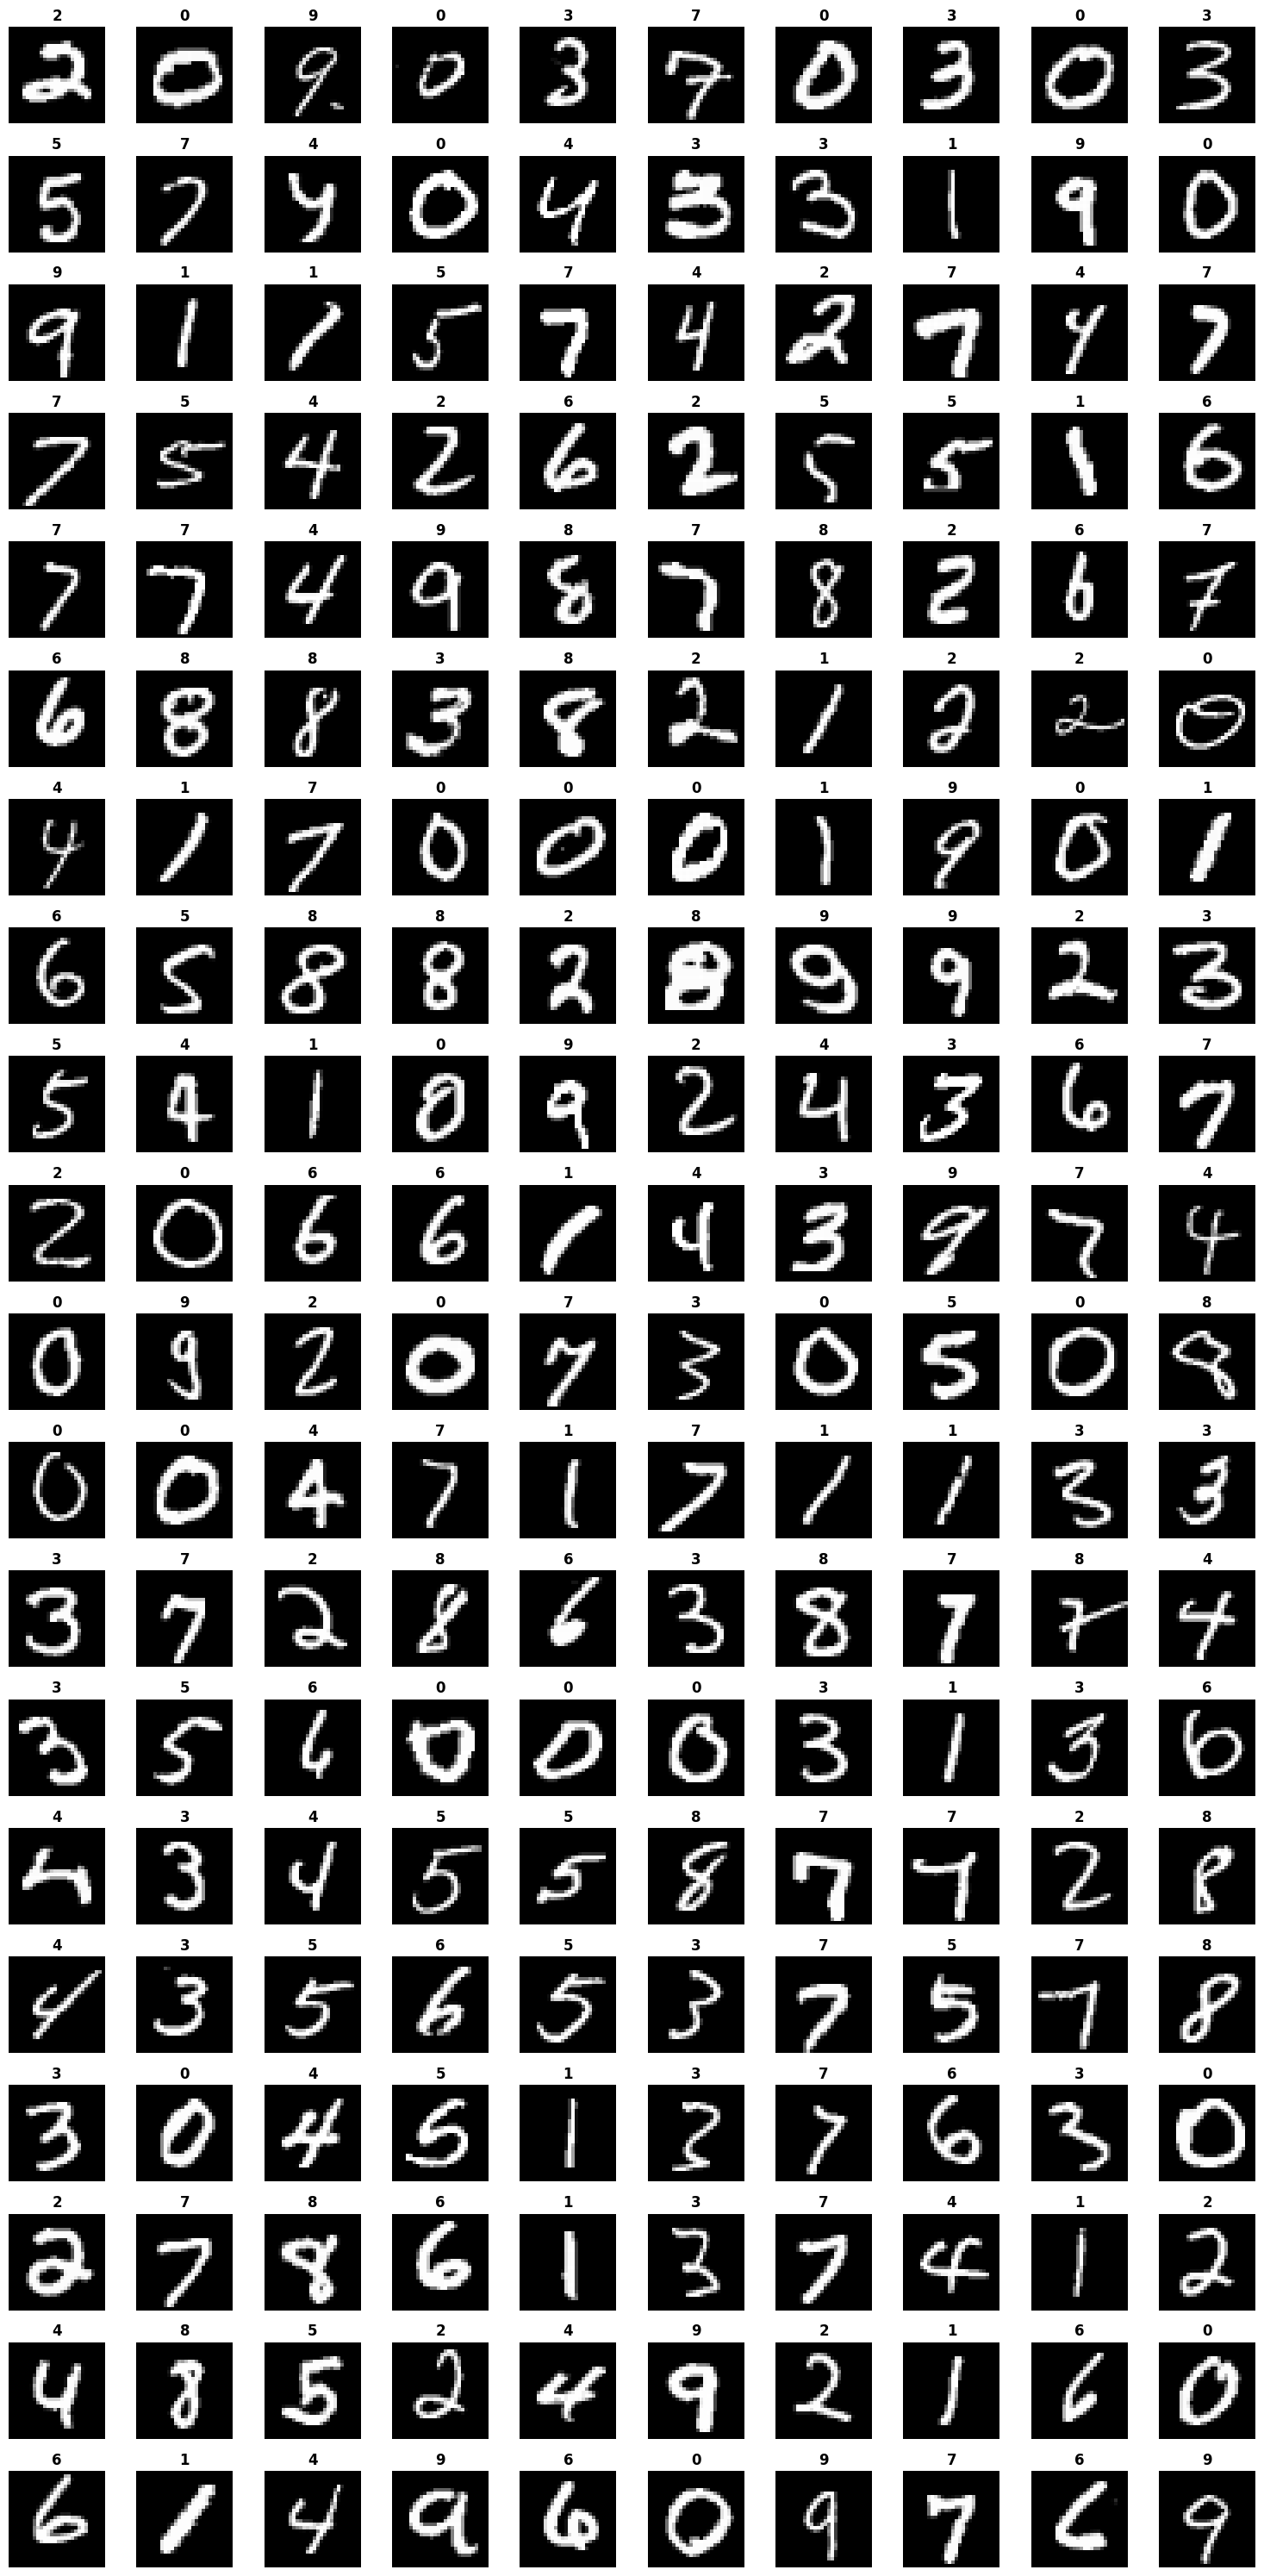

In [9]:
# Plot all the test images with predictions
num_images = 200
num_cols = 10
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 1.5, num_rows * 1.5))

for i in range(num_images):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    ax.imshow(np.squeeze(X_test[i], axis=(2)), cmap='gray')
    ax.axis('off')
    ax.set_title(f'{predictions[i]}', fontweight='bold')

# Hide any remaining empty subplots
for j in range(num_images, num_rows * num_cols):
    row, col = divmod(j, num_cols)
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

In [12]:
ts = test_df.shape[0]

In [13]:
submission_df = pd.DataFrame(data={
    'ImageId': np.arange(ts)+1,
    'Label': predictions
})

In [15]:
submission_df.to_csv('submission.csv', index=False)

In [16]:
model.save('digit-reader.keras')